In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import datetime
import re

from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

In [2]:
directory = '/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/'
location = pd.read_csv(directory + 'data/sdot_censor_location.csv')
# censor2 = censor[censor.시리얼.isin(location.사이트명.unique())]

In [3]:
directory = '/Users/seungji/Desktop/STDA_finalproject/STDA/'

In [4]:
censor10 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2020.12.28-01.03.csv',encoding = 'cp949')
censor11 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.01.04-01.10.csv',encoding = 'cp949')
censor12 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.01.11-01.17.csv',encoding = 'cp949')
censor13 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.01.18-01.24.csv',encoding = 'cp949')
censor14 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.01.25-01.31.csv',encoding = 'cp949')
censor20 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.02.01-02.07.csv',encoding = 'cp949')
censor21 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.02.08-02.14.csv',encoding = 'cp949')
censor22 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.02.15-02.21.csv',encoding = 'cp949')
censor23 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.02.22-02.28.csv',encoding = 'cp949')
censor30 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.03.01-03.07.csv',encoding = 'cp949')
censor31 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.03.08-03.14.csv',encoding = 'cp949')
censor32 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.03.15-03.21.csv',encoding = 'cp949')
censor33 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.03.22-03.28.csv',encoding = 'cp949')
censor34 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.03.29-04.04.csv',encoding = 'cp949')
censor40 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.04.05-04.11.csv',encoding = 'cp949')
censor41 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.04.12-04.18.csv',encoding = 'cp949')
censor42 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.04.19-04.25.csv')
censor43 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.04.26-05.02.csv',encoding = 'cp949')
censor50 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.05.03-05.09.csv',encoding = 'cp949')
censor51 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.05.10-05.16.csv',encoding = 'cp949')
censor52 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.05.17-05.23.csv',encoding = 'cp949')
censor53 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.05.24-05.30.csv',encoding = 'cp949')
censor60 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.05.31-06.06.csv',encoding = 'cp949')
censor61 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.06.07-06.13.csv',encoding = 'cp949')
censor62 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.06.14-06.20.csv',encoding = 'cp949')
censor63 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.06.21-06.27.csv',encoding = 'cp949')
censor70 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.06.28-07.04.csv',encoding = 'cp949')
censor71 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.07.05-07.11.csv',encoding = 'cp949')
censor72 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.07.12-07.18.csv',encoding = 'cp949')
censor73 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.07.19-07.25.csv',encoding = 'cp949')
censor74 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.07.26-08.01.csv',encoding = 'cp949')
censor80 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.08.02-08.08.csv',encoding = 'cp949')
censor81 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.08.09-08.15.csv',encoding = 'cp949')
censor82 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.08.16-08.22.csv',encoding = 'cp949')
censor83 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.08.23-08.29.csv',encoding = 'cp949')
censor84 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.08.30-09.05.csv',encoding = 'cp949')
censor90 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.09.06-09.12.csv',encoding = 'cp949')
censor91 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.09.13-09.19.csv',encoding = 'cp949')
censor92 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.09.20-09.26.csv',encoding = 'cp949')
censor93 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.09.27-10.03.csv',encoding = 'cp949')
censor100 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.10.04-10.10.csv',encoding = 'cp949')
censor101 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.10.11-10.17.csv',encoding = 'cp949')
censor102 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.10.18-10.24.csv',encoding = 'cp949')
censor103 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.10.25-10.31.csv',encoding = 'cp949')


In [5]:
censor42 = pd.read_csv(directory + 'data/censor/S-DoT_WALK_2021.04.19-04.25.csv')

In [6]:
censor42['date'] = list(map(lambda x: str(x)[:4]+'0'+str(x[5:6])+str(x[7:9]),censor42.등록일자))

In [7]:
censor42['time'] = list(map(lambda x: str(x).split(' ')[1].split(':')[0],censor42.등록일자))

In [8]:
idx = [10,11,12,13,14,20,21,22,23,30,31,32,33,34,40,41,43,50,51,52,53,60,61,62,63,70,71,72,73,74,80,81,82,83,84,90,91,92,93,100,101,102,103]

In [9]:
censor51 = censor51[-censor51.방문자수.isin(['방문자수','서울시'])]

In [10]:
censor51.방문자수 = censor51.방문자수.astype('int')

In [11]:
censor = pd.DataFrame()

In [12]:
for i in idx: 
    exec(f"censor{i} = censor{i}[censor{i}.시리얼.isin(location.사이트명.unique())]")

In [13]:
for i in idx: 
    exec(f"censor{i}['date'] = list(map(lambda x: str(x)[:8], censor{i}['날짜']))")
    exec(f"censor{i}['time'] = list(map(lambda x: str(x)[8:10], censor{i}['날짜']))")

In [14]:
for i in idx+[42]: 
    try:
        exec(f"censor{i} = censor{i}.groupby(['시리얼','date','time']).mean().reset_index()[['시리얼','date','방문자수']]")
        exec(f"censor{i} = censor{i}.groupby(['시리얼','date']).sum().reset_index()")
        exec(f"censor = pd.concat([censor, censor{i}],axis = 0)")
    except: 
        print(i)
        pass

In [15]:
directory = '/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/'
location = pd.read_csv(directory + 'data/sdot_censor_location.csv')
# 경기도 과천시 데이터 제거 
location = location.iloc[2:].reset_index(drop=True)
censor2 = censor[censor.시리얼.isin(location.사이트명.unique())]

In [16]:
censor2 = censor[censor.시리얼.isin(location.사이트명.unique())]

In [17]:
censor2 = censor2.reset_index(drop=True)

In [18]:
dt = censor2.date.unique()

In [19]:
censor2 = censor2.groupby(['시리얼','date']).sum().reset_index()

In [20]:
censor2 = censor2[censor2.date>='20210104']

In [21]:
dt = censor2.date.unique()

In [22]:
len(dt)

291

In [23]:
serial_delete = []
for c in censor2.시리얼.unique():
     if len(set(dt)-set(censor2[censor2.시리얼 == c].date))!= 0:
        if len(set(dt)-set(censor2[censor2.시리얼 == c].date))>10: serial_delete.append(c)
        print(len(set(dt)-set(censor2[censor2.시리얼 == c].date)))
#         print(set(dt)-set(censor2[censor2.시리얼 == c].date))

1
10
7
3
8
1
30
1
60
8
143
6
1
6
64
18
1


In [24]:
censor2 = censor2[-censor2.시리얼.isin(serial_delete)].reset_index(drop=True)

In [25]:
censor2.date = list(map(lambda x: str(x[:4]) + '-'+str(x[4:6])+'-'+str(x[6:8]), censor2.date))

In [26]:
dt = censor2.date.unique()
len(dt)

291

In [27]:
serial = []
for c in censor2.시리얼.unique():
    serial += [c]*len(dt)

In [28]:
censor_base = pd.DataFrame({'시리얼':serial, 'date':list(dt)*censor2.시리얼.nunique()})

In [29]:
censor_base = pd.merge(censor_base, censor2, on = ['시리얼','date'], how = 'left')

In [30]:
censor_base.isnull().sum()

시리얼      0
date     0
방문자수    53
dtype: int64

In [31]:
censor_base.date = pd.to_datetime(censor_base.date)
censor_base.index = censor_base.date

In [32]:
censor_base2 = pd.DataFrame()
for c in censor_base.시리얼.unique():
    tmp = censor_base[censor_base.시리얼 == c]
    if tmp.방문자수.isnull().sum()>0:
        tmp = tmp.interpolate(method='bfill')
        censor_base2 = pd.concat([censor_base2, tmp],axis = 0)
    else:
        censor_base2 = pd.concat([censor_base2, tmp],axis = 0)       

In [33]:
censor_base2 = censor_base2[censor_base2.date< '2021-10-24']

In [34]:
censor_base2.isnull().sum()

시리얼     0
date    0
방문자수    0
dtype: int64

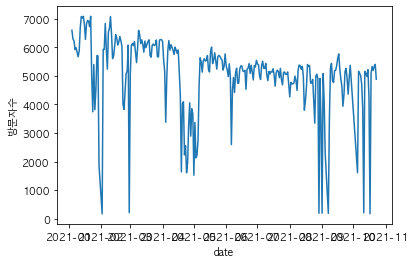

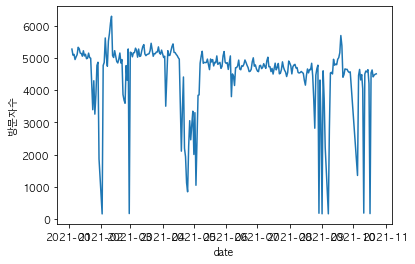

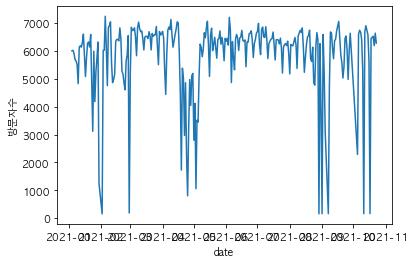

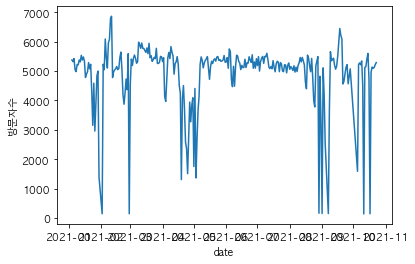

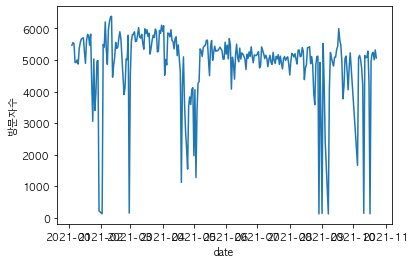

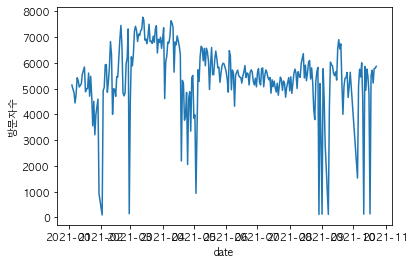

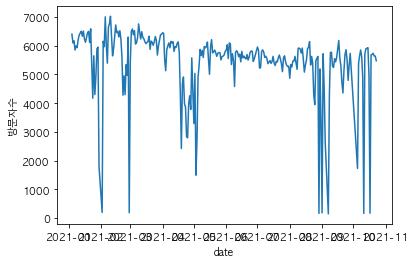

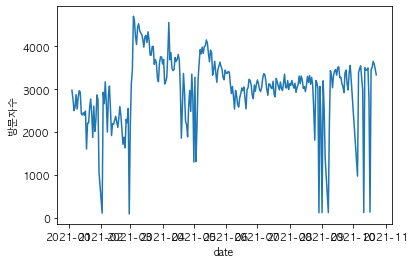

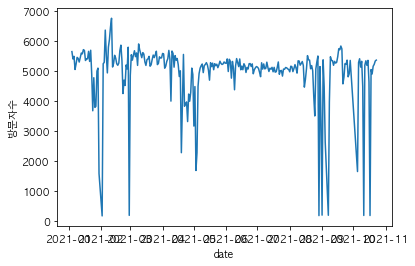

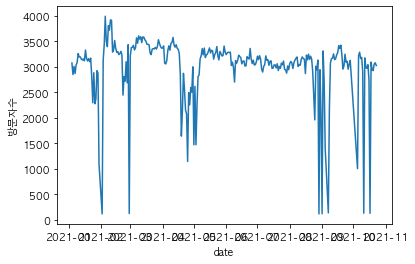

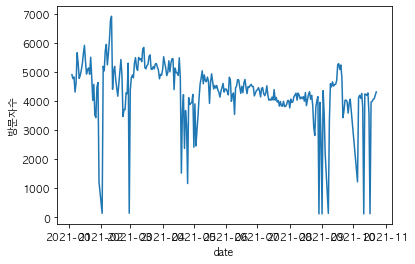

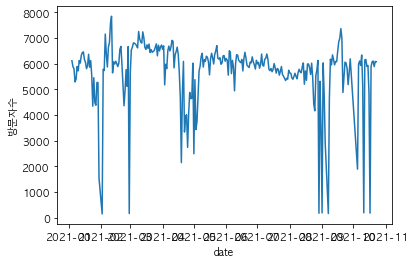

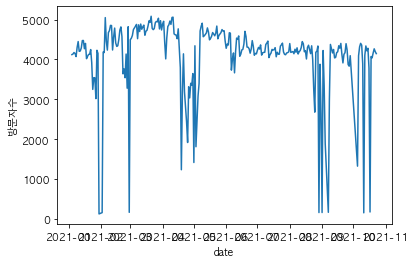

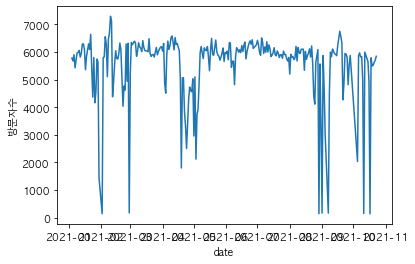

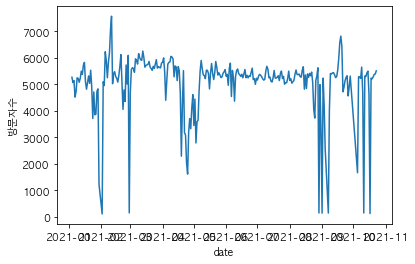

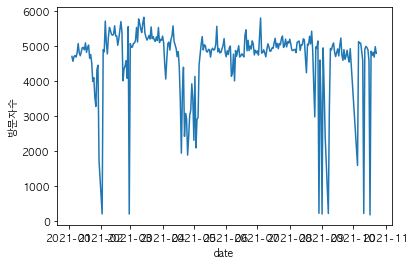

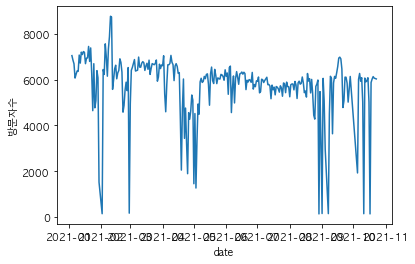

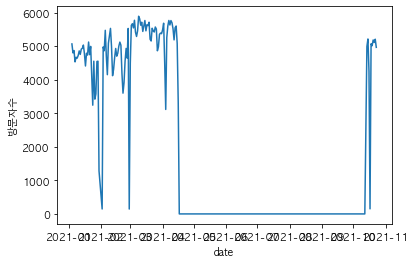

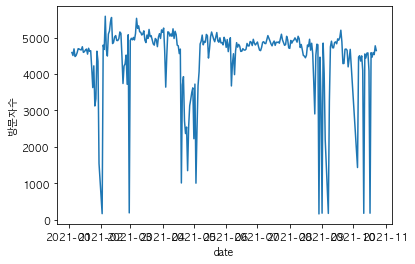

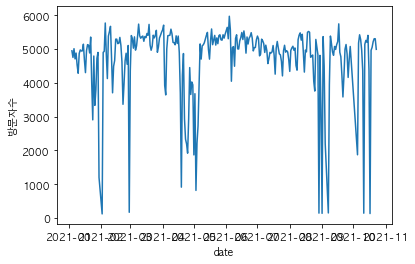

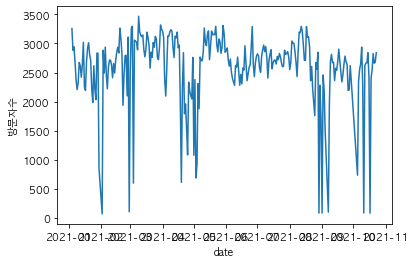

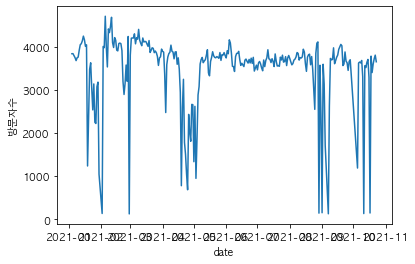

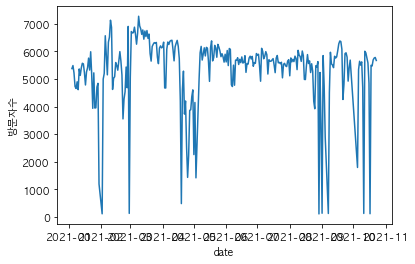

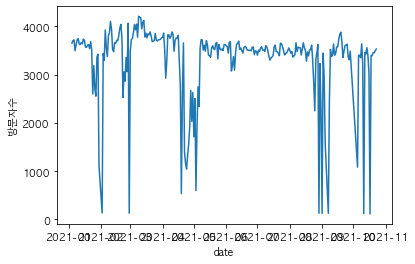

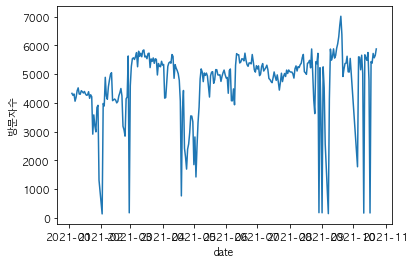

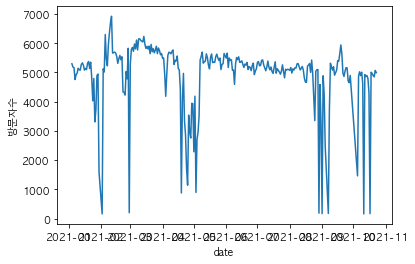

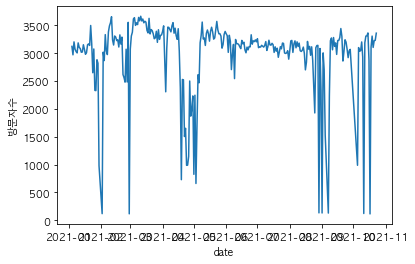

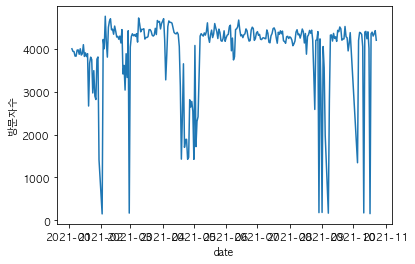

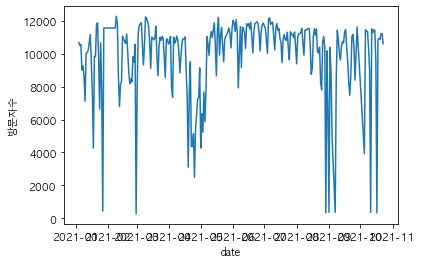

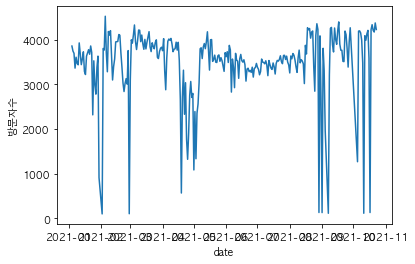

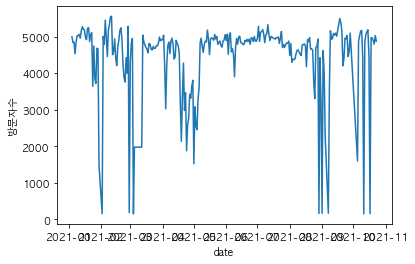

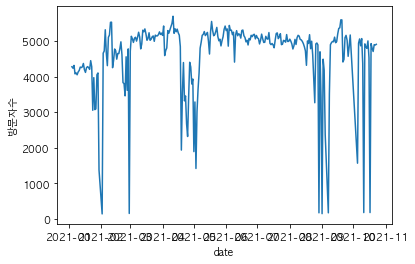

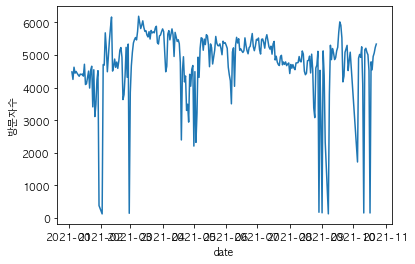

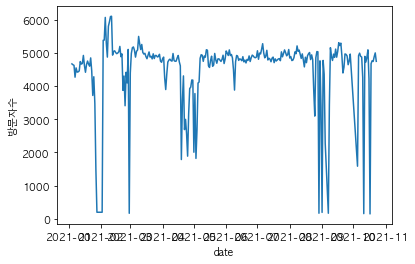

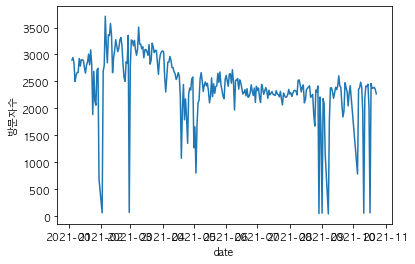

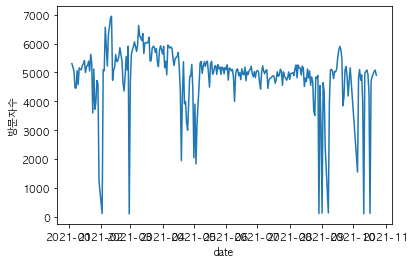

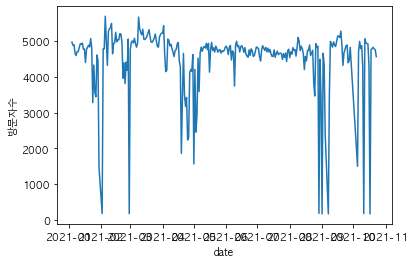

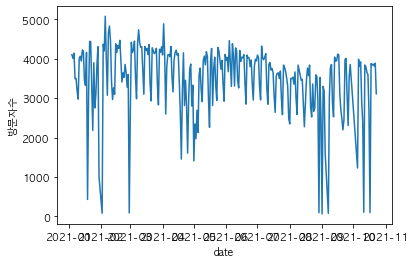

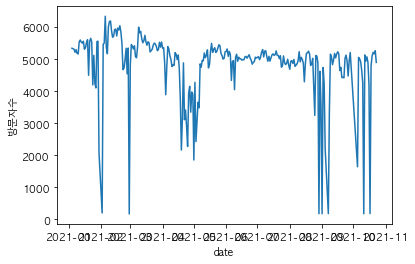

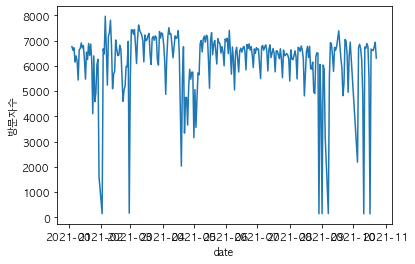

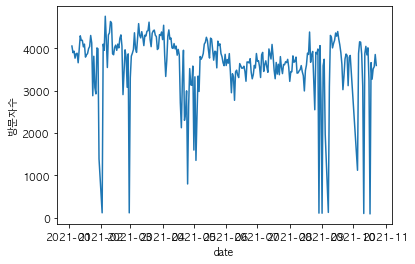

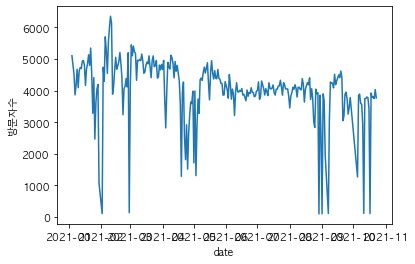

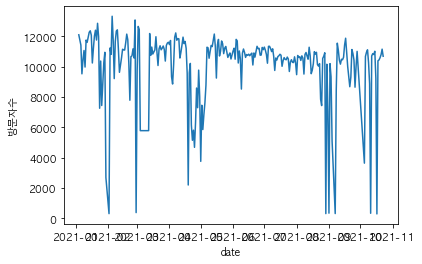

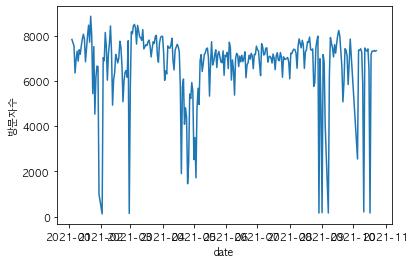

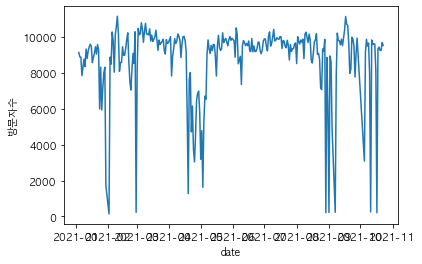

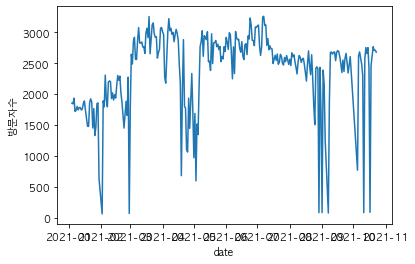

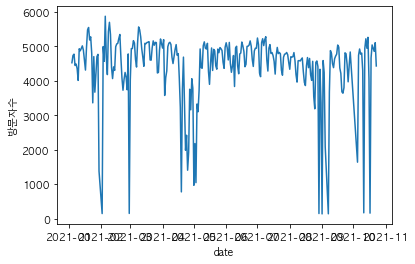

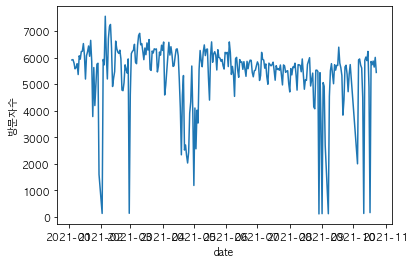

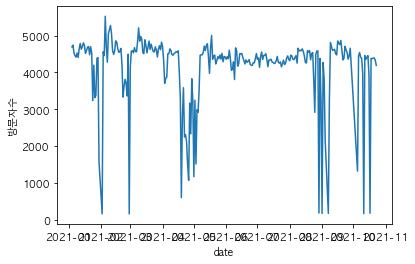

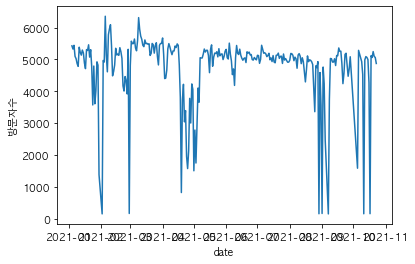

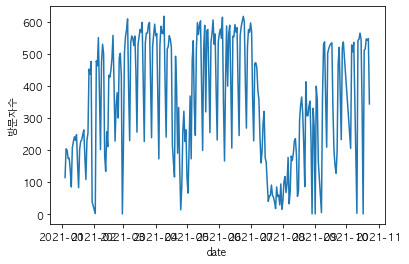

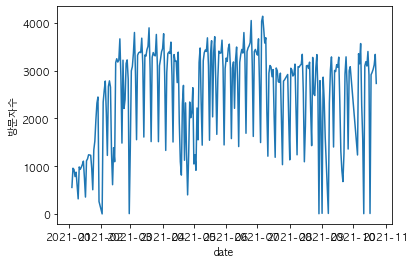

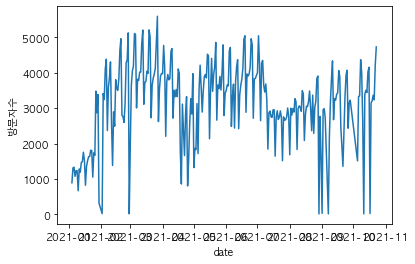

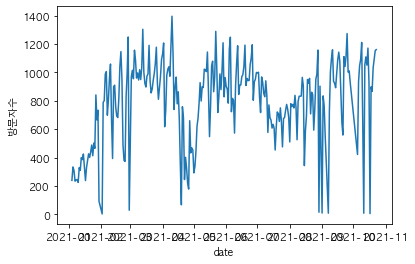

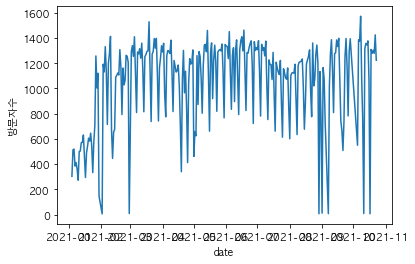

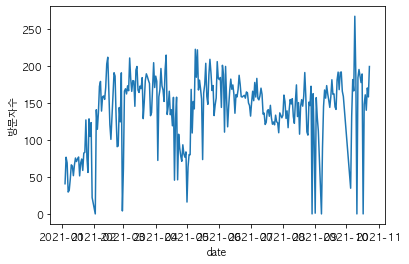

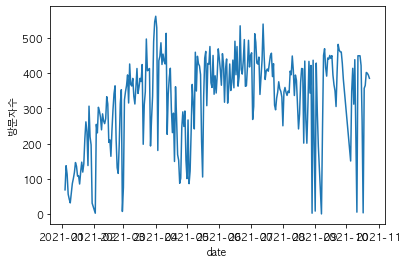

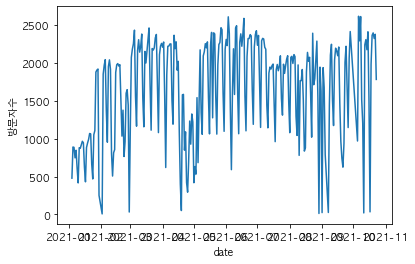

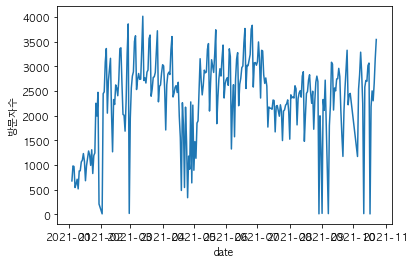

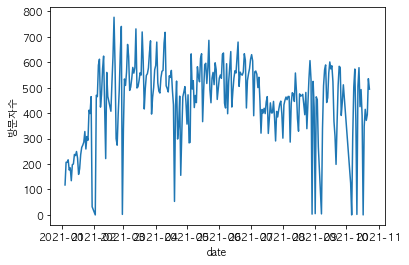

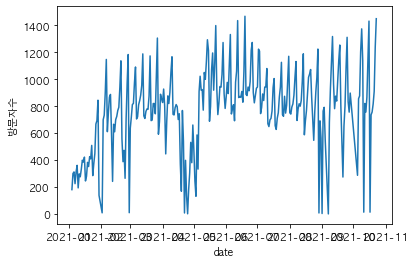

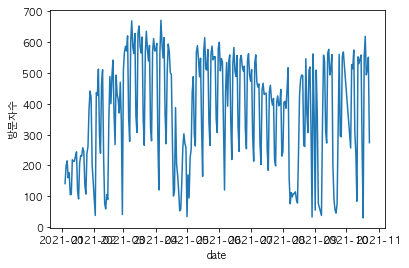

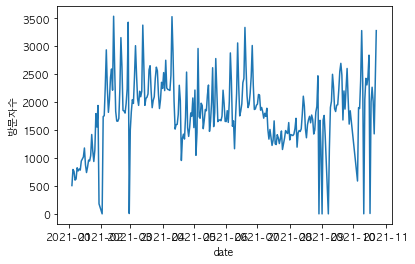

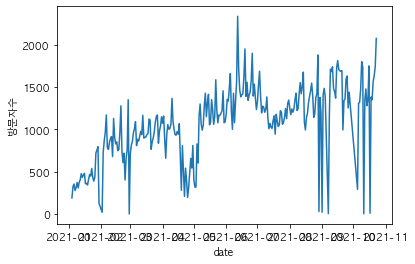

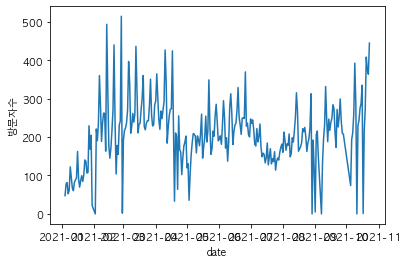

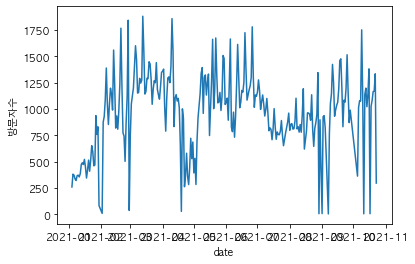

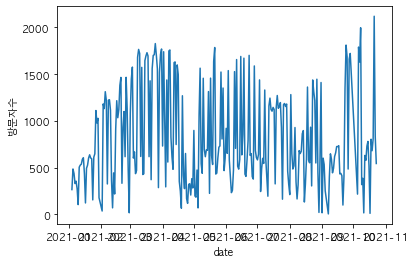

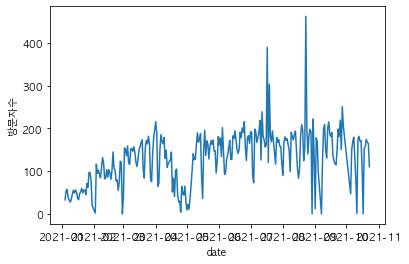

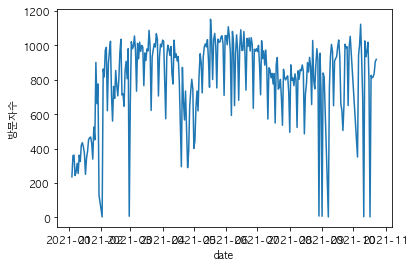

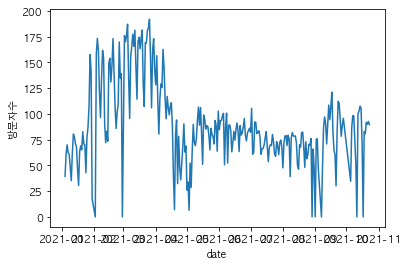

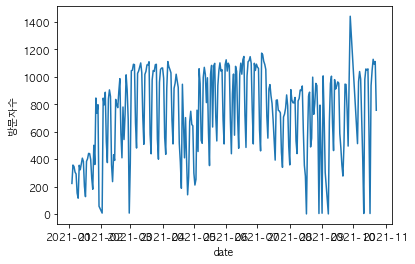

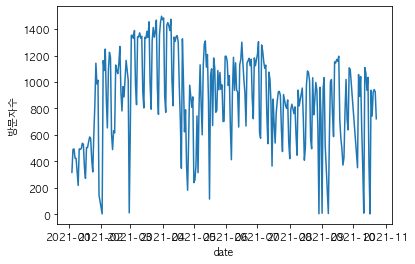

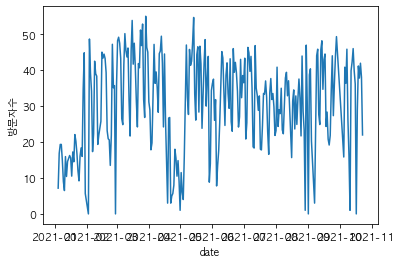

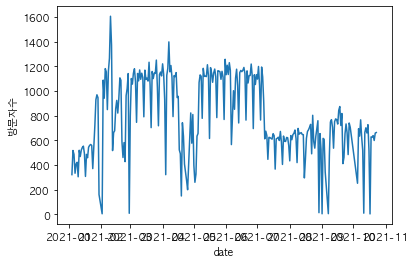

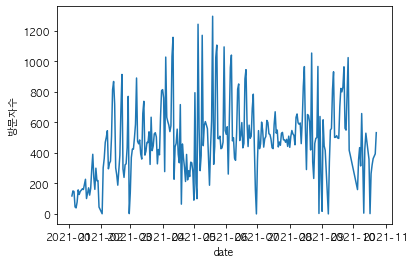

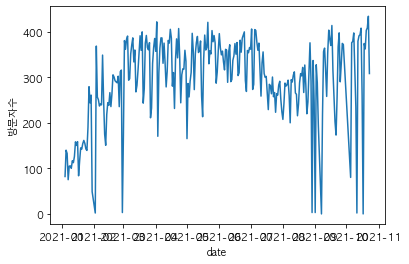

KeyboardInterrupt: 

In [35]:
for c in censor_base2.시리얼.unique():
    tmp = censor_base2[censor_base2.시리얼 == c]
    sns.lineplot(tmp.date, tmp.방문자수)
    plt.show()

In [37]:
location

,순번,시리얼번호,사이트명,자치구,주소,구분,높이,위도,경도
0,3,OC3CL200012,4019,광진구,서울특별시 광진구 화양동 34-75,유동인구,4.0000,37.5440,127.0697
1,4,OC3CL200013,4040,종로구,서울특별시 종로구 삼청동 35-63,유동인구,3.0000,37.5835,126.9826
2,5,OC3CL200014,4043,중구,서울특별시 중구 명동1가 53-1,유동인구,3.3000,37.5636,126.9845
3,6,OC3CL200015,4005,강남구,서울특별시 강남구 신사동 532-12,유동인구,3.4000,37.5234,127.0224
4,7,OC3CL200016,4007,강남구,서울특별시 강남구 신사동 657-37,유동인구,3.8000,37.5259,127.0391
5,8,OC3CL200017,4008,강동구,서울특별시 강동구 성내동 448-8,유동인구,4.5000,37.5241,127.1287
6,9,OC3CL200018,4032,성동구,서울특별시 성동구 성수동1가 685-285,유동인구,3.6000,37.5469,127.0416
7,10,OC3CL200019,4035,용산구,서울특별시 용산구 이태원동 239-4,유동인구,3.2000,37.5403,126.9938
8,11,OC3CL200020,4001,강남구,서울특별시 강남구 역삼동 814-6,유동인구,3.3000,37.5013,127.0264
9,12,OC3CL200021,4002,강남구,서울특별시 강남구 신사동 581-6,유동인구,4.5000,37.5255,127.0282


In [39]:
censor_base2

,시리얼,date,방문자수
date,,,
2021-01-04,"2,992.0000",2021-01-04,"6,594.7167"
2021-01-05,"2,992.0000",2021-01-05,"6,290.3333"
2021-01-06,"2,992.0000",2021-01-06,"6,222.3667"
2021-01-07,"2,992.0000",2021-01-07,"5,919.0333"
2021-01-08,"2,992.0000",2021-01-08,"5,982.3000"
...,...,...,...
2021-10-19,"4,050.0000",2021-10-19,69.1000
2021-10-20,"4,050.0000",2021-10-20,71.4667
2021-10-21,"4,050.0000",2021-10-21,67.8667


In [40]:
location = location[['사이트명','자치구','주소','위도','경도']]

In [42]:
location = location.rename(columns = {'사이트명':'시리얼'})

In [44]:
censor_base2 = pd.merge(censor_base2, location,on = '시리얼', how = 'left'  )

In [45]:
censor_base2

,시리얼,date,방문자수,자치구,주소,위도,경도
0,"2,992.0000",2021-01-04,"6,594.7167",구로구,서울특별시 구로구 구로동 733-28,37.4895,126.8848
1,"2,992.0000",2021-01-05,"6,290.3333",구로구,서울특별시 구로구 구로동 733-28,37.4895,126.8848
2,"2,992.0000",2021-01-06,"6,222.3667",구로구,서울특별시 구로구 구로동 733-28,37.4895,126.8848
3,"2,992.0000",2021-01-07,"5,919.0333",구로구,서울특별시 구로구 구로동 733-28,37.4895,126.8848
4,"2,992.0000",2021-01-08,"5,982.3000",구로구,서울특별시 구로구 구로동 733-28,37.4895,126.8848
...,...,...,...,...,...,...,...
26314,"4,050.0000",2021-10-19,69.1000,서대문구,서울특별시 서대문구 현저동 101,37.5729,126.9556
26315,"4,050.0000",2021-10-20,71.4667,서대문구,서울특별시 서대문구 현저동 101,37.5729,126.9556
26316,"4,050.0000",2021-10-21,67.8667,서대문구,서울특별시 서대문구 현저동 101,37.5729,126.9556
26317,"4,050.0000",2021-10-22,67.0000,서대문구,서울특별시 서대문구 현저동 101,37.5729,126.9556


In [46]:
censor_base2.to_csv('/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/STDA/Project/data/censor.csv',index = False)